<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    48.628619  50.368808  35.620727 -52.299683   92.318470   
      1.0    39.403659  38.570092  52.632585  13.825830  154.432167   
      2.0    20.545233  52.121231  96.187806 -12.222796  166.631473   
      3.0    26.245670  39.069777  77.857953  19.866332  173.039733   
      4.0    83.007043  60.502554  70.778618  38.588590  262.876805   
...                ...        ...        ...        ...         ...   
999.0 15.0   67.812037  56.704692  64.126209 -52.485367  146.157571   
      16.0   44.482361  74.099820  32.390375  86.550471  247.523026   
      17.0   43.805796  45.722330  53.720489 -34.295337  118.953278   
      18.0   55.464083  25.546104  78.463833  10.299903  179.773923   
      19.0   40.594546  69.321669  63.754034  47.210400  230.880648   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    143.257812 -50.939342  
      1.0    156.127965  -1.695798  
      2.0    205.946974 -39.315501  
      3.0    180.557336  -7.517603  
      4.0    238.193607  24.683199  
...                 ...        ...  
999.0 15.0   197.069324 -50.911752  
      16.0   191.627622  55.895404  
      17.0   165.680754 -46.727476  
      18.0   158.161528  21.612395  
      19.0   196.373527  34.507122  

[20000 rows x 7 columns]

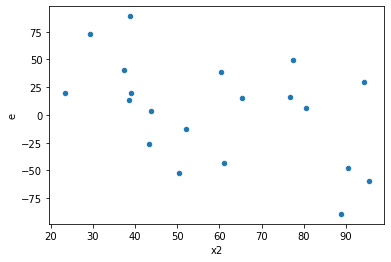

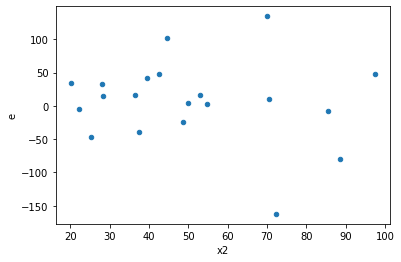

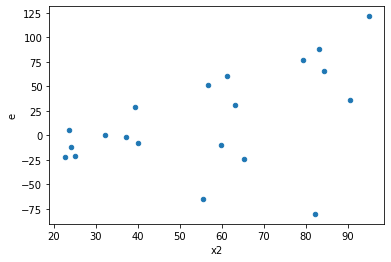

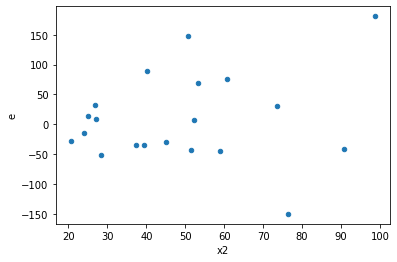

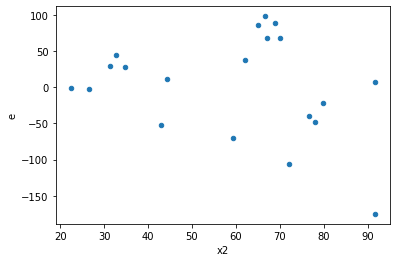

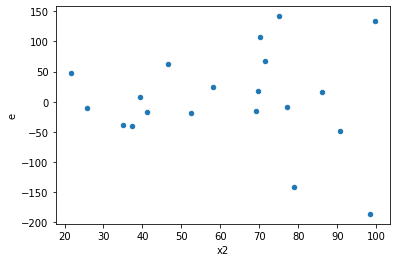

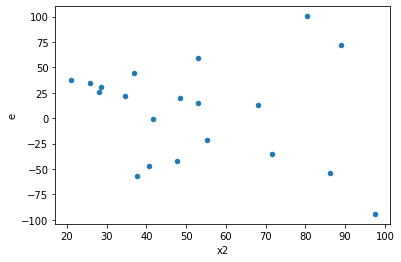

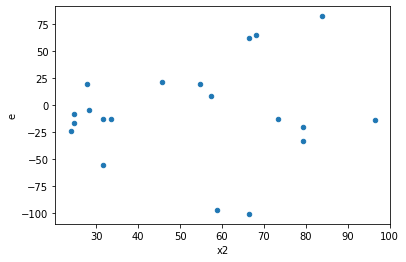

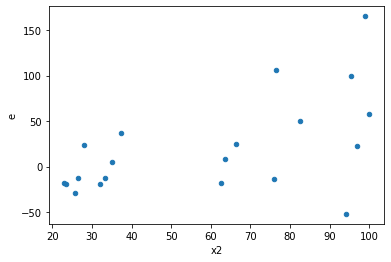

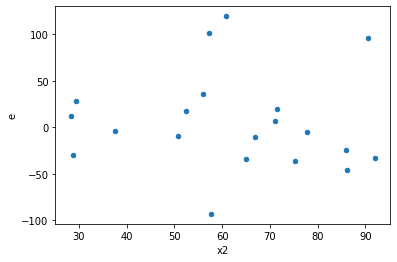

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,2531.8013445462734,4265.504215880944,506.36026890925467,853.1008431761887,1.6847704994980042,0.5809468514209044,0.7095265742895478,0.2904734257104522,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,379.8172946452143,19968.6833946839,75.96345892904286,3993.7366789367798,52.57444480861926,0.0005068663423037911,0.9997465668288481,0.00025343317115189556,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,13494.438229569787,64729.02616849333,2698.8876459139574,12945.805233698666,4.796718845743084,0.11032955199622152,0.9448352240018892,0.05516477599811076,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,6739.636346169593,78941.72675265306,1347.9272692339187,15788.345350530613,11.713054339722474,0.01728961906791926,0.9913551904660404,0.00864480953395963,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4420.428505275804,14221.741381478245,884.0857010551608,2844.348276295649,3.217276642864945,0.2255051077912349,0.8872474461043826,0.11275255389561745,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,826.9125128649753,18183.5417342857,165.38250257299507,3636.70834685714,21.989680227822177,0.0040893104430490546,0.9979553447784755,0.0020446552215245273,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,786.0504914463205,20620.817863742042,157.2100982892641,4124.163572748408,26.23345203410542,0.002697542792945651,0.9986512286035272,0.0013487713964728254,Reject001=0 : Heteroscedasticity
9.0,5.0,5.0,1348.2526060072637,9400.073036044247,269.65052120145276,1880.0146072088494,6.972041436568603,0.05261309782397494,0.9736934510880125,0.02630654891198747,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,2858.341334316863,42910.23616970632,571.6682668633727,8582.047233941263,15.01228550087135,0.00989006193464581,0.9950549690326771,0.004945030967322905,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2531.8013445462734,4265.504215880944,506.36026890925467,853.1008431761887,1.6847704994980042,0.5809468514209044,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,17526.477663643716,14592.045087725339,3505.295532728743,2918.409017545068,0.8325714594664131,0.8455445061686987,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,379.8172946452143,19968.6833946839,75.96345892904286,3993.7366789367798,52.57444480861926,0.0005068663423037911,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,13494.438229569787,64729.02616849333,2698.8876459139574,12945.805233698666,4.796718845743084,0.11032955199622152,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,22971.386327874254,20961.685082040818,4594.27726557485,4192.337016408163,0.9125128445820095,0.922422764385386,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,6739.636346169593,78941.72675265306,1347.9272692339187,15788.345350530613,11.713054339722474,0.01728961906791926,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4420.428505275804,14221.741381478245,884.0857010551608,2844.348276295649,3.217276642864945,0.2255051077912349,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,826.9125128649753,18183.5417342857,165.38250257299507,3636.70834685714,21.989680227822177,0.0040893104430490546,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,786.0504914463205,20620.817863742042,157.2100982892641,4124.163572748408,26.23345203410542,0.002697542792945651,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      921
Reject001=0 : Heteroscedasticity     79
Name: Result_test, dtype: int64